In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import torch

print(torch.cuda.is_available())

False


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip /content/drive/MyDrive/dataset_pantek/datasets-yolov8.zip -d /content/dataset

Mounted at /content/drive
Archive:  /content/drive/MyDrive/dataset_pantek/datasets-yolov8.zip
  inflating: /content/dataset/README.dataset.txt  
  inflating: /content/dataset/README.roboflow.txt  
  inflating: /content/dataset/data.yaml  
   creating: /content/dataset/test/
   creating: /content/dataset/test/images/
 extracting: /content/dataset/test/images/luka_abrasi_21_jpg.rf.f82f3ac4752f1cb291a2bf6aaf934bc1.jpg  
 extracting: /content/dataset/test/images/luka_abrasi_24_jpg.rf.cd4f413cecc28723e4be1faa5e03a3ba.jpg  
 extracting: /content/dataset/test/images/luka_abrasi_27_jpg.rf.f8e869264a16a553a83596e22eb2dd48.jpg  
 extracting: /content/dataset/test/images/luka_abrasi_29_jpg.rf.6db9b8d346923d7ba33410c2622446d5.jpg  
 extracting: /content/dataset/test/images/luka_bakar_1_jpg.rf.ed452cc002301daa630cefa217df6bb2.jpg  
 extracting: /content/dataset/test/images/luka_bakar_24_jpg.rf.56929dc1c42ed7538ead1111490cc0ca.jpg  
 extracting: /content/dataset/test/images/luka_bakar_33_jpg.rf.57b4

In [ ]:
yaml_content = """
train: /content/dataset/train/images
val: /content/dataset/valid/images
test: /content/dataset/test/images

nc: 4
names: ['luka_abrasi', 'luka_sedang', 'luka_terbuka_dalam', 'luka_bakar']
"""

with open('/content/dataset/data.yaml', 'w') as f:
    f.write(yaml_content)

In [ ]:
model = YOLO('yolov8n.pt')  # load pretrained YOLOv8
results = model.train(
    data='/content/dataset/data.yaml',
    epochs=50,
    imgsz=256,
    batch=8,
    name='yolov8_luka_segmentation'
)

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_luka_segmentation2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0,

In [ ]:
model.val()

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 277.5±70.6 MB/s, size: 5.5 KB)
val: Scanning /content/dataset/valid/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 16/16 10.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.4it/s 0.7s
                   all         16         27      0.605      0.809      0.768      0.407
           luka_abrasi          2          3      0.422          1      0.806      0.598
           luka_sedang          8         18      0.542        0.5      0.562      0.351
    luka_terbuka_dalam          2          2          1      0.984      0.995      0.335
            luka_bakar          4          4      0.454       0.75      0.708      0.343
Speed: 0.3ms preprocess, 39.4ms inference, 0.0ms loss,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x781b485c7d40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

## Save Model

In [ ]:
!find /content -name "best.pt"

/content/runs/detect/yolov8_luka_segmentation2/weights/best.pt


In [ ]:
!cp /content/runs/detect/yolov8_luka_segmentation2/weights/best.pt "/content/drive/MyDrive/model_yolo_luka.pt"
print("✅ Model berhasil disimpan ke Google Drive!")

✅ Model berhasil disimpan ke Google Drive!


In [ ]:
model = YOLO("/content/drive/MyDrive/model_yolo_luka.pt")
results = model.predict(source="/content/drive/MyDrive/dataset_pantek/luka_abrasi_17.jpg", show=True)


image 1/1 /content/drive/MyDrive/dataset_pantek/luka_abrasi_17.jpg: 256x256 1 luka_abrasi, 163.9ms
Speed: 1.0ms preprocess, 163.9ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 256)


## Predict

In [ ]:
!ls -R runs

runs:
detect

runs/detect:
val  yolov8_luka_segmentation  yolov8_luka_segmentation2

runs/detect/val:
BoxF1_curve.png  BoxR_curve.png			  val_batch0_labels.jpg
BoxP_curve.png	 confusion_matrix_normalized.png  val_batch0_pred.jpg
BoxPR_curve.png  confusion_matrix.png

runs/detect/yolov8_luka_segmentation:
args.yaml  weights

runs/detect/yolov8_luka_segmentation/weights:

runs/detect/yolov8_luka_segmentation2:
args.yaml			 labels.jpg	     train_batch681.jpg
BoxF1_curve.png			 results.csv	     train_batch682.jpg
BoxP_curve.png			 results.png	     val_batch0_labels.jpg
BoxPR_curve.png			 train_batch0.jpg    val_batch0_pred.jpg
BoxR_curve.png			 train_batch1.jpg    weights
confusion_matrix_normalized.png  train_batch2.jpg
confusion_matrix.png		 train_batch680.jpg

runs/detect/yolov8_luka_segmentation2/weights:
best.pt  last.pt


Saving luka_abrasi_23_jpg.rf.dcd17cbff2c1cf049a07b1b33489c81a.jpg to luka_abrasi_23_jpg.rf.dcd17cbff2c1cf049a07b1b33489c81a (1).jpg

🔹 Gambar diupload: luka_abrasi_23_jpg.rf.dcd17cbff2c1cf049a07b1b33489c81a (1).jpg

image 1/1 /content/luka_abrasi_23_jpg.rf.dcd17cbff2c1cf049a07b1b33489c81a (1).jpg: 256x256 1 luka_abrasi, 50.7ms
Speed: 1.0ms preprocess, 50.7ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 256)


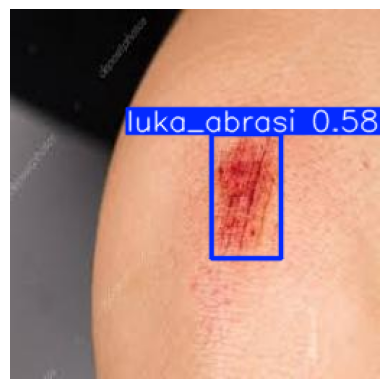

In [ ]:
from google.colab import files
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Upload gambar baru
uploaded = files.upload()

# Load model dari hasil training
model = YOLO("/content/runs/detect/yolov8_luka_segmentation2/weights/best.pt")

# Prediksi gambar yang diupload
for filename in uploaded.keys():
    print(f"\n🔹 Gambar diupload: {filename}")

    results = model.predict(source=filename, conf=0.5, show=False)

    # Tampilkan hasil prediksi langsung dari memori
    result_img = results[0].plot()  # hasil prediksi jadi numpy array
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()